In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('mnist_train.csv')
X.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


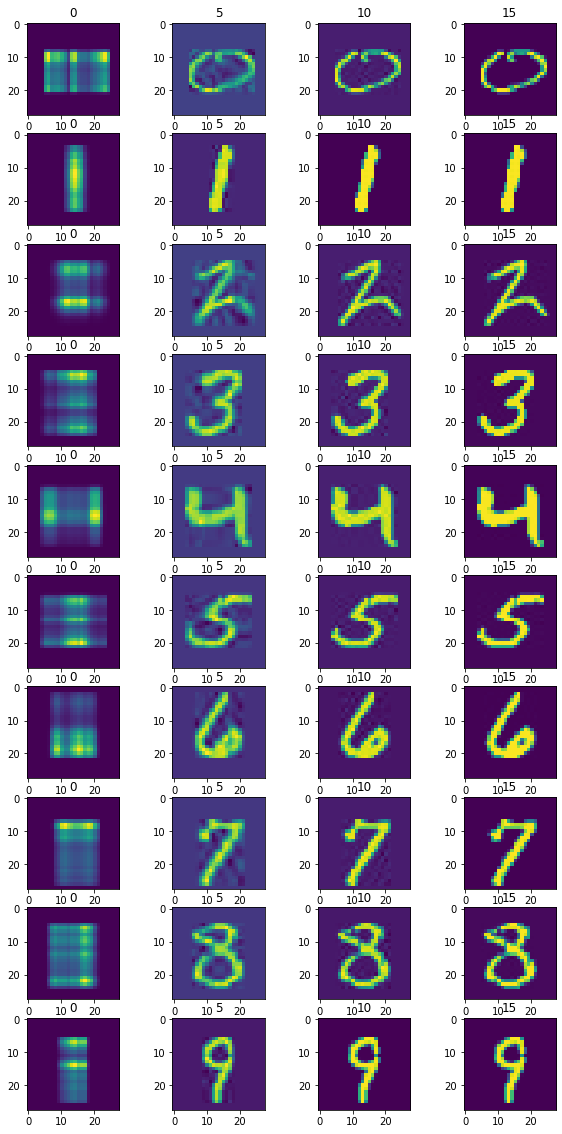

In [4]:
#low rank approximations
fig,ax =  plt.subplots(10,4,figsize=(10, 20))
for p in range(10):
    num = p
    no = np.sum(np.array(X['label']==num))
    v5 = np.array(X[X['label']==num].set_index(np.arange(no)).loc[30][1:]).reshape(28,28)
    u,s,vt = np.linalg.svd(v5)
    ax[p,0].imshow(u[:,:1]@np.diag(s)[:1:,:1]@vt[:1,:])
    ax[p,0].set_title('0')
    ax[p,1].imshow(u[:,:5]@np.diag(s)[:5,:5]@vt[:5,:])
    ax[p,1].set_title('5')
    ax[p,2].imshow(u[:,:10]@np.diag(s)[:10,:10]@vt[:10,:])
    ax[p,2].set_title('10')
    ax[p,3].imshow(u[:,:15]@np.diag(s)[:15,:15]@vt[:15,:])
    ax[p,3].set_title('15')
plt.show()

In [5]:
S = []  #max singular values
num = 0
no = np.sum(np.array(X['label']==num))
arr5 = X[X['label']==num].set_index(np.arange(no))
#store nth largest singular value of each image with number num 
for i in range(no):
    temp = np.array(arr5.loc[i][1:]).reshape(28,28)
    u,s,fvt = np.linalg.svd(temp)
    S.append(s[0])

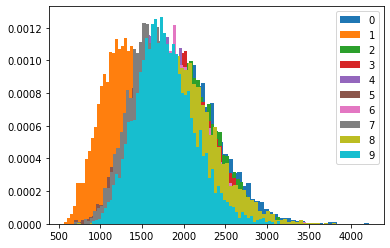

In [6]:
#plot distrubution of largest singular values corresponding to each numbers  
for j in range(10):   
    S1 = []  #max singular values
    num = j
    no = np.sum(np.array(X['label']==num))
    arr5 = X[X['label']==num].set_index(np.arange(no))
    #store nth largest singular value of each image with number num 
    for i in range(no):
        temp = np.array(arr5.loc[i][1:]).reshape(28,28)
        u,s,vt = np.linalg.svd(temp)
        S1.append(s[0])
    plt.hist(S1,bins=63,density=True)
plt.legend(range(0,10))
plt.show()

In [3]:
#load MNIST dataset and divide into train and test dataset
data = pd.read_csv('mnist_train.csv')
labels = data['label'].to_numpy()
features = data.drop(['label'],axis=1).to_numpy()
print(np.shape(labels))

t = int(0.7*len(labels))
train_indices = np.random.choice(len(labels),t,replace=True)
test_indices = list(set(range(len(labels)))-set(train_indices))
train_features = features[train_indices]
train_label = labels[train_indices]
test_features = features[test_indices]
test_label = labels[test_indices]

(60000,)


c:\users\prath\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\prath\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


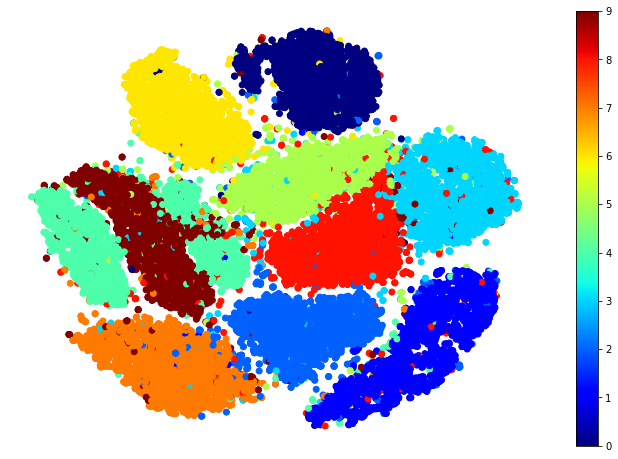

In [11]:
#Visualization of Dataset in 2-dimension 
#dimensionality reduction done with t-SNE
#takes around 6 min
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, random_state = 49)

#reduce the dimension to 2 from 784 using t-SNE alg
X_tsne = tsne.fit_transform(test_features)

#plot in reduced dimesions
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c = test_label, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()

In [45]:
import torch
import torch.nn as nn

#for reproducibility 
torch.manual_seed(1)

#basic toy neural network model for study 
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(28*28,128)
        self.relu1 = nn.Tanh()
        self.linear2 = nn.Linear(128,256)
        self.relu2 = nn.Tanh()
        self.linear3 = nn.Linear(256,128)
        self.relu3 = nn.Tanh()
        self.linear5 = nn.Linear(128,64)
        self.linear4 = nn.Linear(64,10)
        self.softmax = nn.Softmax(dim=1)
    def forward(self,x):
        lin1_out = self.linear1(x)
        relu_out1 = self.relu1(lin1_out)
        out_ =  self.relu2(self.linear2(relu_out1))
        out_ = self.relu3(self.linear3(out_))
        out_ = self.relu3(self.linear5(out_))
        return self.softmax(self.linear4(out_))

In [5]:
#low rank approximation dataset creation
rank = [2,5,10,15,20]
arr_list = []
for k in range(len(rank)):
    arr = np.empty(np.shape(test_features))
    for j in range(len(test_label)):
        u,s,vt = np.linalg.svd(test_features[j,:].reshape(28,28))
        temp = u[:,:rank[k]]@np.diag(s[:rank[k]])@vt[:rank[k],:]
        arr[j,:] =  temp.reshape(1,28*28)
    arr_list.append(arr)
    print(f'rank {rank[k]} done')

rank 2 done
rank 5 done
rank 10 done
rank 15 done
rank 20 done


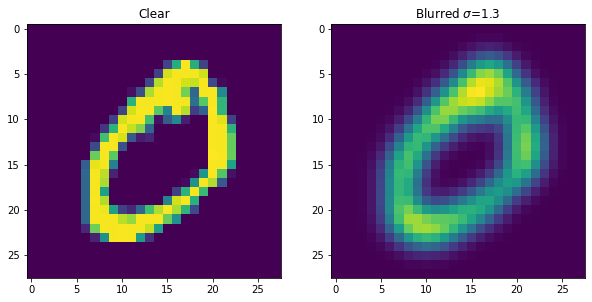

In [6]:
blurr_var = [0.25,0.5,0.75,1,1.25,1.5,1.75] #width of the gaussian function used for blurring 
#higher the blurr_var ,more blurry is the image
#create blurred images
#use gaussian filter for blurring image, 
#only for testing
from scipy.ndimage import gaussian_filter
blur_data = np.copy(test_features)
highf_data = np.copy(test_features)
blur_data2 = np.copy(test_features)
blur_arr = []
for j in range(len(test_label)):
    temp = gaussian_filter(blur_data[j,:].reshape(28,28),sigma=1)
    temp1 = gaussian_filter(blur_data[j,:].reshape(28,28),sigma=1.3)
    temp2 = blur_data[j,:].reshape(28,28) - temp
    blur_data[j,:] = temp.reshape(1,28*28)
    highf_data[j,:] = temp2.reshape(1,28*28)
    blur_data2[j,:] = temp1.reshape(1,28*28)
    
for i in range(len(blurr_var)):
    #temp = gaussian_filter(blur_data[j,:].reshape(28,28),sigma=blurr_var[i])
    blur_temp = np.copy(test_features)
    for j in range(len(test_label)):
        temp = gaussian_filter(blur_temp[j,:].reshape(28,28),sigma=blurr_var[i])
        blur_temp[j,:] = temp.reshape(1,28*28)
    blur_arr.append(blur_temp)
#plot blurred image of number 0 sigma=1.3
fig,ax =  plt.subplots(1,2,figsize=(10, 20))
ax[1].imshow(blur_data2[0,:].reshape(28,28))
ax[0].imshow(test_features[0,:].reshape(28,28))
ax[0].set_title('Clear')
ax[1].set_title('Blurred $\sigma$=1.3')
plt.show()

In [41]:
#test with low rank approximations training data set
#randomize the label and check the performance
#low rank approx label
rank2_label_train = np.copy(test_label)
rank2_label_train[test_label==0] = 0
rank2_label_train[test_label==6] = 0
rank2_label_train[test_label==8] = 0
rank2_label_train[test_label==9] = 0
rank2_label_train[test_label==2] = 2
rank2_label_train[test_label==3] = 2
rank2_label_train[test_label==5] = 2
rank2_label_train[test_label==7] = 2

net = MnistModel()
loss_criterion = nn.CrossEntropyLoss()
num_epochs = 200
loss_2 = []
loss_5 = []
loss_10 = []
loss_15 = []
loss_20 = []
full_r = []
loss_r = [full_r,loss_2,loss_5,loss_10,loss_15,loss_20]
loss_rank_r = []
optimizer = torch.optim.Adam(net.parameters(),lr=0.001)
input_tensor = torch.from_numpy(train_features).type(torch.FloatTensor)
label_tensor = torch.from_numpy(train_label)
for epoch in range(num_epochs):
    output = net(input_tensor)
    loss = loss_criterion(output,label_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    '''
    input_tensor_tst = torch.from_numpy(test_features).type(torch.FloatTensor)
    label_tensor_tst = torch.from_numpy(test_label)
    out_probs = net(input_tensor_tst).detach().numpy()
    out_classes = np.argmax(out_probs,axis=1)
    loss_r[0].append(round(sum(out_classes==test_label)/len(test_label),3))
    for j in range(1,len(loss_r)):
            test_tensor = torch.from_numpy(arr_list[j-1]).type(torch.FloatTensor)
            label_test_tensor = torch.from_numpy(train_label)
            out_probs = net(test_tensor).detach().numpy()
            out_classes = np.argmax(out_probs,axis=1)
            loss_r[j].append(round(sum(out_classes==train_label)/len(train_label),3))
            
    '''
    if epoch<21:
        print('Epoch {}/{} => loss: {:.2f}'.format(epoch+1,num_epochs,loss.item()))
        test_tensor = torch.from_numpy(blur_data).type(torch.FloatTensor)
        label_test_tensor = torch.from_numpy(test_label)
        out_probs = net(test_tensor).detach().numpy()
        out_classes = np.argmax(out_probs,axis=1)
        print(f"  gauss blurr s1: {round(sum(out_classes==test_label)/len(test_label),3)}")
        test_tensor = torch.from_numpy(blur_data2).type(torch.FloatTensor)
        label_test_tensor = torch.from_numpy(test_label)
        out_probs = net(test_tensor).detach().numpy()
        out_classes = np.argmax(out_probs,axis=1)
        print(f"  gauss blurr s2: {round(sum(out_classes==test_label)/len(test_label),3)}")
        test_tensor = torch.from_numpy(highf_data).type(torch.FloatTensor)
        label_test_tensor = torch.from_numpy(test_label)
        out_probs = net(test_tensor).detach().numpy()
        out_classes = np.argmax(out_probs,axis=1)
        print(f"  high_freq: {round(sum(out_classes==test_label)/len(test_label),3)}")
        test_tensor = torch.from_numpy(test_features + np.random.normal(0,1,np.shape(test_features))).type(torch.FloatTensor)
        label_test_tensor = torch.from_numpy(test_label)
        out_probs = net(test_tensor).detach().numpy()
        out_classes = np.argmax(out_probs,axis=1)
        print(f"  Normal test: {round(sum(out_classes==test_label)/len(test_label),3)}")
        for j in range(len(rank)):
            test_tensor = torch.from_numpy(arr_list[j]).type(torch.FloatTensor)
            label_test_tensor = torch.from_numpy(test_label)
            out_probs = net(test_tensor).detach().numpy()
            out_classes = np.argmax(out_probs,axis=1)
            
            out_classes2 = np.copy(out_classes)
            out_classes2[out_classes2==0] = 0
            out_classes2[out_classes2==6] = 0
            out_classes2[out_classes2==8] = 0
            out_classes2[out_classes2==9] = 0
            out_classes2[out_classes2==2] = 2
            out_classes2[out_classes2==3] = 2
            out_classes2[out_classes2==5] = 2
            out_classes2[out_classes2==7] = 2
            print(f"   Acc f rank {rank[j]}: {round(sum(out_classes==test_label)/len(test_label),3)}, 2r: {round(sum(out_classes2==rank2_label_train)/len(test_label),3)}")
            #'''
print('done')

Epoch 1/200 => loss: 2.30
  gauss blurr s1: 0.415
  gauss blurr s2: 0.414
  high_freq: 0.2
  Normal test: 0.373
   Acc f rank 2: 0.365, 2r: 0.499
   Acc f rank 5: 0.382, 2r: 0.518
   Acc f rank 10: 0.376, 2r: 0.515
   Acc f rank 15: 0.375, 2r: 0.514
   Acc f rank 20: 0.374, 2r: 0.514
Epoch 2/200 => loss: 2.28
  gauss blurr s1: 0.521
  gauss blurr s2: 0.521


KeyboardInterrupt: 

In [42]:
#test with low rank approximations training data set
#for pvalue calc
#low rank approx label
s_loss = np.zeros((len(arr_list)+1,5,1000))
for k in range(1000):
    net = MnistModel()
    loss_criterion = nn.CrossEntropyLoss()
    num_epochs = 5
    print(f'itr: {k+1}')
    optimizer = torch.optim.Adam(net.parameters(),lr=0.001)
    input_tensor = torch.from_numpy(train_features).type(torch.FloatTensor)
    label_tensor = torch.from_numpy(train_label)
    for epoch in range(num_epochs):
        output = net(input_tensor)
        loss = loss_criterion(output,label_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch<5:
            test_tensor = torch.from_numpy(test_features).type(torch.FloatTensor)
            label_test_tensor = torch.from_numpy(test_label)
            out_probs = net(test_tensor).detach().numpy()
            out_classes = np.argmax(out_probs,axis=1)
            t = round(sum(out_classes==test_label)/len(test_label),3)
            s_loss[0,epoch,k] = t
            print(f' epoch: {epoch+1}')
            print(f"    Normal test: {t}")
            for j in range(len(arr_list)):
                test_tensor = torch.from_numpy(arr_list[j]).type(torch.FloatTensor)
                label_test_tensor = torch.from_numpy(test_label)
                out_probs = net(test_tensor).detach().numpy()
                out_classes = np.argmax(out_probs,axis=1)
                t = round(sum(out_classes==test_label)/len(test_label),3)
                print(f"    Rank {rank[j]} test: {t}")
                s_loss[j+1,epoch,k] = t
            #break
print('done')

itr: 1
 epoch: 1
    Normal test: 0.443
    Rank 2 test: 0.433
    Rank 5 test: 0.452
    Rank 10 test: 0.444
    Rank 15 test: 0.443
    Rank 20 test: 0.443


KeyboardInterrupt: 

In [35]:
import scipy.stats
print('p value')
for j in range(1,len(arr_list)+1):
    print(f'rank{rank[j-1]} ->',end='')
    for i in range(5):
        ttest,pvalue = scipy.stats.mannwhitneyu(s_loss[j,i,:],s_loss[0,i,:],alternative="greater")
        print(pvalue,'|',end='')
    print('')

p value
rank2 ->0.9999999999999604 |1.0 |1.0 |1.0 |1.0 |
rank5 ->0.0013868212978600226 |0.004275557895522536 |0.03782230542734219 |0.11501306589384241 |0.20248172320908475 |
rank10 ->0.3754700553029164 |0.4008798064131039 |0.42143835799892426 |0.433316947125578 |0.44089841053730067 |
rank15 ->0.5016220012235304 |0.4964470824160972 |0.4898674217101829 |0.500602461274886 |0.4931569537522148 |
rank20 ->0.5000154476980396 |0.5000154477194981 |0.5000154476624918 |0.5000154477398908 |0.5000154478460266 |


In [46]:
#low frequency approximation
blurr_var = [0.25,0.5,0.75,1,1.25,1.5,1.75]

net = MnistModel()
loss_criterion = nn.CrossEntropyLoss()
num_epochs = 200
optimizer = torch.optim.Adam(net.parameters(),lr=0.001)
input_tensor = torch.from_numpy(train_features).type(torch.FloatTensor)
label_tensor = torch.from_numpy(train_label)
l = []
outer_prod = np.zeros((10,20))
for i in range(len(blurr_var)):
    l.append([])
    
for epoch in range(num_epochs):
    output = net(input_tensor)
    loss = loss_criterion(output,label_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch<21:
        print('Epoch {}/{} => loss: {:.2f}'.format(epoch+1,num_epochs,loss.item()))
        test_tensor = torch.from_numpy(blur_data).type(torch.FloatTensor)
        label_test_tensor = torch.from_numpy(test_label)
        out_probs = net(test_tensor).detach().numpy()
        out_classes = np.argmax(out_probs,axis=1)
        print(f"  gauss blurr s1: {round(sum(out_classes==test_label)/len(test_label),3)}")
        test_tensor = torch.from_numpy(blur_data2).type(torch.FloatTensor)
        label_test_tensor = torch.from_numpy(test_label)
        out_probs = net(test_tensor).detach().numpy()
        out_classes = np.argmax(out_probs,axis=1)
        print(f"  gauss blurr s2: {round(sum(out_classes==test_label)/len(test_label),3)}")
        test_tensor = torch.from_numpy(highf_data).type(torch.FloatTensor)
        label_test_tensor = torch.from_numpy(test_label)
        out_probs = net(test_tensor).detach().numpy()
        out_classes = np.argmax(out_probs,axis=1)
        print(f"  high_freq: {round(sum(out_classes==test_label)/len(test_label),3)}")
        test_tensor = torch.from_numpy(test_features).type(torch.FloatTensor)
        label_test_tensor = torch.from_numpy(test_label)
        out_probs = net(test_tensor).detach().numpy()
        out_classes = np.argmax(out_probs,axis=1)
        print(f"  Normal test: {round(sum(out_classes==test_label)/len(test_label),3)}")
        outer_prod[:,epoch] = out_probs[5,:].T
        if epoch==19:
            break
        for j in range(len(blurr_var)):
            test_tensor = torch.from_numpy(blur_arr[j]).type(torch.FloatTensor)
            label_test_tensor = torch.from_numpy(test_label)
            out_probs = net(test_tensor).detach().numpy()
            out_classes = np.argmax(out_probs,axis=1)
            print(f"   Acc f blurr {blurr_var[j]}: {round(sum(out_classes==test_label)/len(test_label),3)}")
            l[j].append(round(sum(out_classes==test_label)/len(test_label),3))
        #break
            #'''
print('done')
#lt.show()

Epoch 1/200 => loss: 2.30
  gauss blurr s1: 0.398
  gauss blurr s2: 0.4
  high_freq: 0.171
  Normal test: 0.363
   Acc f blurr 0.25: 0.363
   Acc f blurr 0.5: 0.377
   Acc f blurr 0.75: 0.39
   Acc f blurr 1: 0.398
   Acc f blurr 1.25: 0.4
   Acc f blurr 1.5: 0.4
   Acc f blurr 1.75: 0.394
Epoch 2/200 => loss: 2.29
  gauss blurr s1: 0.588
  gauss blurr s2: 0.582
  high_freq: 0.28
  Normal test: 0.554
   Acc f blurr 0.25: 0.554
   Acc f blurr 0.5: 0.57
   Acc f blurr 0.75: 0.582
   Acc f blurr 1: 0.588
   Acc f blurr 1.25: 0.583
   Acc f blurr 1.5: 0.573
   Acc f blurr 1.75: 0.551
Epoch 3/200 => loss: 2.28
  gauss blurr s1: 0.625
  gauss blurr s2: 0.618
  high_freq: 0.38
  Normal test: 0.603
   Acc f blurr 0.25: 0.603
   Acc f blurr 0.5: 0.615
   Acc f blurr 0.75: 0.622
   Acc f blurr 1: 0.625
   Acc f blurr 1.25: 0.62
   Acc f blurr 1.5: 0.607
   Acc f blurr 1.75: 0.587
Epoch 4/200 => loss: 2.26
  gauss blurr s1: 0.636
  gauss blurr s2: 0.628
  high_freq: 0.441
  Normal test: 0.618
   

KeyboardInterrupt: 

In [79]:
#plt.imshow(outer_prod[:,1].reshape((10,1))@outer_prod[:,19].reshape((10,1)).T)
print(test_label[5])

5


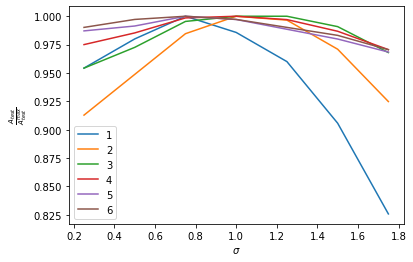

In [25]:
n = np.arange(0,len(blurr_var))
new_l = [[]]
for i in range(len(l[0])):
    for j in range(len(blurr_var)):
        new_l[i].append(l[j][i])
    new_l.append([])
    max_l = max(new_l[i])
    for k in range(len(blurr_var)):
        new_l[i][k] = new_l[i][k]/max_l
new_l.pop()
for i in range(len(new_l)-13):
    plt.plot(blurr_var,new_l[i])
plt.legend(np.arange(0,len(new_l)-13)+1)
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\frac{A_{test}}{A_{test}^{max}}$')
plt.show()

In [27]:
#test hypothesis test accuracy sigma1>clear
from sklearn.manifold import TSNE
#test with low freq approximations training data set
blurr_var = [0.25,0.5,0.75,1,1.25,1.5,1.75]
#low rank approx label
rank2_label_train = np.copy(test_label)
rank2_label_train[test_label==0] = 0
rank2_label_train[test_label==6] = 0
rank2_label_train[test_label==8] = 0
rank2_label_train[test_label==9] = 0
rank2_label_train[test_label==2] = 2
rank2_label_train[test_label==3] = 2
rank2_label_train[test_label==5] = 2
rank2_label_train[test_label==7] = 2

sigma_loss = np.empty((10,1000,len(blurr_var)+1))
for k in range(1000):
    net = MnistModel()
    loss_criterion = nn.CrossEntropyLoss()
    num_epochs = 200
    optimizer = torch.optim.Adam(net.parameters(),lr=0.001)
    input_tensor = torch.from_numpy(train_features).type(torch.FloatTensor)
    label_tensor = torch.from_numpy(train_label)

    for epoch in range(num_epochs):
        output = net(input_tensor)
        loss = loss_criterion(output,label_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch<10:
            #print('Epoch {}/{} => loss: {:.2f}'.format(epoch+1,num_epochs,loss.item()))
            test_tensor = torch.from_numpy(blur_data).type(torch.FloatTensor)
            label_test_tensor = torch.from_numpy(test_label)
            out_probs = net(test_tensor).detach().numpy()
            out_classes = np.argmax(out_probs,axis=1)
            #print(f"  gauss blurr s1: {round(sum(out_classes==test_label)/len(test_label),3)}")
            test_tensor = torch.from_numpy(blur_data2).type(torch.FloatTensor)
            label_test_tensor = torch.from_numpy(test_label)
            out_probs = net(test_tensor).detach().numpy()
            out_classes = np.argmax(out_probs,axis=1)
            #print(f"  gauss blurr s2: {round(sum(out_classes==test_label)/len(test_label),3)}")
            test_tensor = torch.from_numpy(highf_data).type(torch.FloatTensor)
            label_test_tensor = torch.from_numpy(test_label)
            out_probs = net(test_tensor).detach().numpy()
            out_classes = np.argmax(out_probs,axis=1)
            #print(f"  high_freq: {round(sum(out_classes==test_label)/len(test_label),3)}")
            test_tensor = torch.from_numpy(test_features).type(torch.FloatTensor)
            label_test_tensor = torch.from_numpy(test_label)
            out_probs = net(test_tensor).detach().numpy()
            out_classes = np.argmax(out_probs,axis=1)
            #print(f"  Normal test: {round(sum(out_classes==test_label)/len(test_label),3)}")
            sigma_loss[epoch,k,0] = round(sum(out_classes==test_label)/len(test_label),3)
            for j in range(len(blurr_var)):
                test_tensor = torch.from_numpy(blur_arr[j]).type(torch.FloatTensor)
                label_test_tensor = torch.from_numpy(test_label)
                out_probs = net(test_tensor).detach().numpy()
                out_classes = np.argmax(out_probs,axis=1)

                out_classes2 = np.copy(out_classes)
                out_classes2[out_classes2==0] = 0
                out_classes2[out_classes2==6] = 0
                out_classes2[out_classes2==8] = 0
                out_classes2[out_classes2==9] = 0
                out_classes2[out_classes2==2] = 2
                out_classes2[out_classes2==3] = 2
                out_classes2[out_classes2==5] = 2
                out_classes2[out_classes2==7] = 2
                #print(f"   Acc f blurr {blurr_var[j]}: {round(sum(out_classes==test_label)/len(test_label),3)}, 2r: {round(sum(out_classes2==rank2_label_train)/len(test_label),3)}")
                sigma_loss[epoch,k,j+1] = round(sum(out_classes==test_label)/len(test_label),3)
            print(f'done itr:{k+1}  epoch={epoch+1}')
        else: 
            break
                #'''
print('done')

done itr:1  epoch=1
done itr:1  epoch=2
done itr:1  epoch=3
done itr:1  epoch=4
done itr:1  epoch=5
done itr:1  epoch=6
done itr:1  epoch=7
done itr:1  epoch=8
done itr:1  epoch=9
done itr:1  epoch=10
done itr:2  epoch=1
done itr:2  epoch=2
done itr:2  epoch=3
done itr:2  epoch=4
done itr:2  epoch=5
done itr:2  epoch=6
done itr:2  epoch=7
done itr:2  epoch=8
done itr:2  epoch=9
done itr:2  epoch=10
done itr:3  epoch=1
done itr:3  epoch=2
done itr:3  epoch=3
done itr:3  epoch=4
done itr:3  epoch=5
done itr:3  epoch=6
done itr:3  epoch=7
done itr:3  epoch=8
done itr:3  epoch=9
done itr:3  epoch=10
done itr:4  epoch=1
done itr:4  epoch=2
done itr:4  epoch=3
done itr:4  epoch=4
done itr:4  epoch=5
done itr:4  epoch=6
done itr:4  epoch=7
done itr:4  epoch=8
done itr:4  epoch=9
done itr:4  epoch=10
done itr:5  epoch=1
done itr:5  epoch=2
done itr:5  epoch=3
done itr:5  epoch=4
done itr:5  epoch=5
done itr:5  epoch=6
done itr:5  epoch=7
done itr:5  epoch=8
done itr:5  epoch=9
done itr:5  epoc

done itr:40  epoch=4
done itr:40  epoch=5
done itr:40  epoch=6
done itr:40  epoch=7
done itr:40  epoch=8
done itr:40  epoch=9
done itr:40  epoch=10
done itr:41  epoch=1
done itr:41  epoch=2
done itr:41  epoch=3
done itr:41  epoch=4
done itr:41  epoch=5
done itr:41  epoch=6
done itr:41  epoch=7
done itr:41  epoch=8
done itr:41  epoch=9
done itr:41  epoch=10
done itr:42  epoch=1
done itr:42  epoch=2
done itr:42  epoch=3
done itr:42  epoch=4
done itr:42  epoch=5
done itr:42  epoch=6
done itr:42  epoch=7
done itr:42  epoch=8
done itr:42  epoch=9
done itr:42  epoch=10
done itr:43  epoch=1
done itr:43  epoch=2
done itr:43  epoch=3
done itr:43  epoch=4
done itr:43  epoch=5
done itr:43  epoch=6
done itr:43  epoch=7
done itr:43  epoch=8
done itr:43  epoch=9
done itr:43  epoch=10
done itr:44  epoch=1
done itr:44  epoch=2
done itr:44  epoch=3
done itr:44  epoch=4
done itr:44  epoch=5
done itr:44  epoch=6
done itr:44  epoch=7
done itr:44  epoch=8
done itr:44  epoch=9
done itr:44  epoch=10
done itr

done itr:79  epoch=3
done itr:79  epoch=4
done itr:79  epoch=5
done itr:79  epoch=6
done itr:79  epoch=7
done itr:79  epoch=8
done itr:79  epoch=9
done itr:79  epoch=10
done itr:80  epoch=1
done itr:80  epoch=2
done itr:80  epoch=3
done itr:80  epoch=4
done itr:80  epoch=5
done itr:80  epoch=6
done itr:80  epoch=7
done itr:80  epoch=8
done itr:80  epoch=9
done itr:80  epoch=10
done itr:81  epoch=1
done itr:81  epoch=2
done itr:81  epoch=3
done itr:81  epoch=4
done itr:81  epoch=5
done itr:81  epoch=6
done itr:81  epoch=7
done itr:81  epoch=8
done itr:81  epoch=9
done itr:81  epoch=10
done itr:82  epoch=1
done itr:82  epoch=2
done itr:82  epoch=3
done itr:82  epoch=4
done itr:82  epoch=5
done itr:82  epoch=6
done itr:82  epoch=7
done itr:82  epoch=8
done itr:82  epoch=9
done itr:82  epoch=10
done itr:83  epoch=1
done itr:83  epoch=2
done itr:83  epoch=3
done itr:83  epoch=4
done itr:83  epoch=5
done itr:83  epoch=6
done itr:83  epoch=7
done itr:83  epoch=8
done itr:83  epoch=9
done itr:

done itr:117  epoch=4
done itr:117  epoch=5
done itr:117  epoch=6
done itr:117  epoch=7
done itr:117  epoch=8
done itr:117  epoch=9
done itr:117  epoch=10
done itr:118  epoch=1
done itr:118  epoch=2
done itr:118  epoch=3
done itr:118  epoch=4
done itr:118  epoch=5
done itr:118  epoch=6
done itr:118  epoch=7
done itr:118  epoch=8
done itr:118  epoch=9
done itr:118  epoch=10
done itr:119  epoch=1
done itr:119  epoch=2
done itr:119  epoch=3
done itr:119  epoch=4
done itr:119  epoch=5
done itr:119  epoch=6
done itr:119  epoch=7
done itr:119  epoch=8
done itr:119  epoch=9
done itr:119  epoch=10
done itr:120  epoch=1
done itr:120  epoch=2
done itr:120  epoch=3
done itr:120  epoch=4
done itr:120  epoch=5
done itr:120  epoch=6
done itr:120  epoch=7
done itr:120  epoch=8
done itr:120  epoch=9
done itr:120  epoch=10
done itr:121  epoch=1
done itr:121  epoch=2
done itr:121  epoch=3
done itr:121  epoch=4
done itr:121  epoch=5
done itr:121  epoch=6
done itr:121  epoch=7
done itr:121  epoch=8
done i

done itr:154  epoch=5
done itr:154  epoch=6
done itr:154  epoch=7
done itr:154  epoch=8
done itr:154  epoch=9
done itr:154  epoch=10
done itr:155  epoch=1
done itr:155  epoch=2
done itr:155  epoch=3
done itr:155  epoch=4
done itr:155  epoch=5
done itr:155  epoch=6
done itr:155  epoch=7
done itr:155  epoch=8
done itr:155  epoch=9
done itr:155  epoch=10
done itr:156  epoch=1
done itr:156  epoch=2
done itr:156  epoch=3
done itr:156  epoch=4
done itr:156  epoch=5
done itr:156  epoch=6
done itr:156  epoch=7
done itr:156  epoch=8
done itr:156  epoch=9
done itr:156  epoch=10
done itr:157  epoch=1
done itr:157  epoch=2
done itr:157  epoch=3
done itr:157  epoch=4
done itr:157  epoch=5
done itr:157  epoch=6
done itr:157  epoch=7
done itr:157  epoch=8
done itr:157  epoch=9
done itr:157  epoch=10
done itr:158  epoch=1
done itr:158  epoch=2
done itr:158  epoch=3
done itr:158  epoch=4
done itr:158  epoch=5
done itr:158  epoch=6
done itr:158  epoch=7
done itr:158  epoch=8
done itr:158  epoch=9
done i

done itr:191  epoch=6
done itr:191  epoch=7
done itr:191  epoch=8
done itr:191  epoch=9
done itr:191  epoch=10
done itr:192  epoch=1
done itr:192  epoch=2
done itr:192  epoch=3
done itr:192  epoch=4
done itr:192  epoch=5
done itr:192  epoch=6
done itr:192  epoch=7
done itr:192  epoch=8
done itr:192  epoch=9
done itr:192  epoch=10
done itr:193  epoch=1
done itr:193  epoch=2
done itr:193  epoch=3
done itr:193  epoch=4
done itr:193  epoch=5
done itr:193  epoch=6
done itr:193  epoch=7
done itr:193  epoch=8
done itr:193  epoch=9
done itr:193  epoch=10
done itr:194  epoch=1
done itr:194  epoch=2
done itr:194  epoch=3
done itr:194  epoch=4
done itr:194  epoch=5
done itr:194  epoch=6
done itr:194  epoch=7
done itr:194  epoch=8
done itr:194  epoch=9
done itr:194  epoch=10
done itr:195  epoch=1
done itr:195  epoch=2
done itr:195  epoch=3
done itr:195  epoch=4
done itr:195  epoch=5
done itr:195  epoch=6
done itr:195  epoch=7
done itr:195  epoch=8
done itr:195  epoch=9
done itr:195  epoch=10
done 

done itr:228  epoch=7
done itr:228  epoch=8
done itr:228  epoch=9
done itr:228  epoch=10
done itr:229  epoch=1
done itr:229  epoch=2
done itr:229  epoch=3
done itr:229  epoch=4
done itr:229  epoch=5
done itr:229  epoch=6
done itr:229  epoch=7
done itr:229  epoch=8
done itr:229  epoch=9
done itr:229  epoch=10
done itr:230  epoch=1
done itr:230  epoch=2
done itr:230  epoch=3
done itr:230  epoch=4
done itr:230  epoch=5
done itr:230  epoch=6
done itr:230  epoch=7
done itr:230  epoch=8
done itr:230  epoch=9
done itr:230  epoch=10
done itr:231  epoch=1
done itr:231  epoch=2
done itr:231  epoch=3
done itr:231  epoch=4
done itr:231  epoch=5
done itr:231  epoch=6
done itr:231  epoch=7
done itr:231  epoch=8
done itr:231  epoch=9
done itr:231  epoch=10
done itr:232  epoch=1
done itr:232  epoch=2
done itr:232  epoch=3
done itr:232  epoch=4
done itr:232  epoch=5
done itr:232  epoch=6
done itr:232  epoch=7
done itr:232  epoch=8
done itr:232  epoch=9
done itr:232  epoch=10
done itr:233  epoch=1
done 

done itr:265  epoch=8
done itr:265  epoch=9
done itr:265  epoch=10
done itr:266  epoch=1
done itr:266  epoch=2
done itr:266  epoch=3
done itr:266  epoch=4
done itr:266  epoch=5
done itr:266  epoch=6
done itr:266  epoch=7
done itr:266  epoch=8
done itr:266  epoch=9
done itr:266  epoch=10
done itr:267  epoch=1
done itr:267  epoch=2
done itr:267  epoch=3
done itr:267  epoch=4
done itr:267  epoch=5
done itr:267  epoch=6
done itr:267  epoch=7
done itr:267  epoch=8
done itr:267  epoch=9
done itr:267  epoch=10
done itr:268  epoch=1
done itr:268  epoch=2
done itr:268  epoch=3
done itr:268  epoch=4
done itr:268  epoch=5
done itr:268  epoch=6
done itr:268  epoch=7
done itr:268  epoch=8
done itr:268  epoch=9
done itr:268  epoch=10
done itr:269  epoch=1
done itr:269  epoch=2
done itr:269  epoch=3
done itr:269  epoch=4
done itr:269  epoch=5
done itr:269  epoch=6
done itr:269  epoch=7
done itr:269  epoch=8
done itr:269  epoch=9
done itr:269  epoch=10
done itr:270  epoch=1
done itr:270  epoch=2
done 

done itr:302  epoch=9
done itr:302  epoch=10
done itr:303  epoch=1
done itr:303  epoch=2
done itr:303  epoch=3
done itr:303  epoch=4
done itr:303  epoch=5
done itr:303  epoch=6
done itr:303  epoch=7
done itr:303  epoch=8
done itr:303  epoch=9
done itr:303  epoch=10
done itr:304  epoch=1
done itr:304  epoch=2
done itr:304  epoch=3
done itr:304  epoch=4
done itr:304  epoch=5
done itr:304  epoch=6
done itr:304  epoch=7
done itr:304  epoch=8
done itr:304  epoch=9
done itr:304  epoch=10
done itr:305  epoch=1
done itr:305  epoch=2
done itr:305  epoch=3
done itr:305  epoch=4
done itr:305  epoch=5
done itr:305  epoch=6
done itr:305  epoch=7
done itr:305  epoch=8
done itr:305  epoch=9
done itr:305  epoch=10
done itr:306  epoch=1
done itr:306  epoch=2
done itr:306  epoch=3
done itr:306  epoch=4
done itr:306  epoch=5
done itr:306  epoch=6
done itr:306  epoch=7
done itr:306  epoch=8
done itr:306  epoch=9
done itr:306  epoch=10
done itr:307  epoch=1
done itr:307  epoch=2
done itr:307  epoch=3
done 

done itr:339  epoch=10
done itr:340  epoch=1
done itr:340  epoch=2
done itr:340  epoch=3
done itr:340  epoch=4
done itr:340  epoch=5
done itr:340  epoch=6
done itr:340  epoch=7
done itr:340  epoch=8
done itr:340  epoch=9
done itr:340  epoch=10
done itr:341  epoch=1
done itr:341  epoch=2
done itr:341  epoch=3
done itr:341  epoch=4
done itr:341  epoch=5
done itr:341  epoch=6
done itr:341  epoch=7
done itr:341  epoch=8
done itr:341  epoch=9
done itr:341  epoch=10
done itr:342  epoch=1
done itr:342  epoch=2
done itr:342  epoch=3
done itr:342  epoch=4
done itr:342  epoch=5
done itr:342  epoch=6
done itr:342  epoch=7
done itr:342  epoch=8
done itr:342  epoch=9
done itr:342  epoch=10
done itr:343  epoch=1
done itr:343  epoch=2
done itr:343  epoch=3
done itr:343  epoch=4
done itr:343  epoch=5
done itr:343  epoch=6
done itr:343  epoch=7
done itr:343  epoch=8
done itr:343  epoch=9
done itr:343  epoch=10
done itr:344  epoch=1
done itr:344  epoch=2
done itr:344  epoch=3
done itr:344  epoch=4
done 

done itr:377  epoch=1
done itr:377  epoch=2
done itr:377  epoch=3
done itr:377  epoch=4
done itr:377  epoch=5
done itr:377  epoch=6
done itr:377  epoch=7
done itr:377  epoch=8
done itr:377  epoch=9
done itr:377  epoch=10
done itr:378  epoch=1
done itr:378  epoch=2
done itr:378  epoch=3
done itr:378  epoch=4
done itr:378  epoch=5
done itr:378  epoch=6
done itr:378  epoch=7
done itr:378  epoch=8
done itr:378  epoch=9
done itr:378  epoch=10
done itr:379  epoch=1
done itr:379  epoch=2
done itr:379  epoch=3
done itr:379  epoch=4
done itr:379  epoch=5
done itr:379  epoch=6
done itr:379  epoch=7
done itr:379  epoch=8
done itr:379  epoch=9
done itr:379  epoch=10
done itr:380  epoch=1
done itr:380  epoch=2
done itr:380  epoch=3
done itr:380  epoch=4
done itr:380  epoch=5
done itr:380  epoch=6
done itr:380  epoch=7
done itr:380  epoch=8
done itr:380  epoch=9
done itr:380  epoch=10
done itr:381  epoch=1
done itr:381  epoch=2
done itr:381  epoch=3
done itr:381  epoch=4
done itr:381  epoch=5
done i

done itr:414  epoch=2
done itr:414  epoch=3
done itr:414  epoch=4
done itr:414  epoch=5
done itr:414  epoch=6
done itr:414  epoch=7
done itr:414  epoch=8
done itr:414  epoch=9
done itr:414  epoch=10
done itr:415  epoch=1
done itr:415  epoch=2
done itr:415  epoch=3
done itr:415  epoch=4
done itr:415  epoch=5
done itr:415  epoch=6
done itr:415  epoch=7
done itr:415  epoch=8
done itr:415  epoch=9
done itr:415  epoch=10
done itr:416  epoch=1
done itr:416  epoch=2
done itr:416  epoch=3
done itr:416  epoch=4
done itr:416  epoch=5
done itr:416  epoch=6
done itr:416  epoch=7
done itr:416  epoch=8
done itr:416  epoch=9
done itr:416  epoch=10
done itr:417  epoch=1
done itr:417  epoch=2
done itr:417  epoch=3
done itr:417  epoch=4
done itr:417  epoch=5
done itr:417  epoch=6
done itr:417  epoch=7
done itr:417  epoch=8
done itr:417  epoch=9
done itr:417  epoch=10
done itr:418  epoch=1
done itr:418  epoch=2
done itr:418  epoch=3
done itr:418  epoch=4
done itr:418  epoch=5
done itr:418  epoch=6
done i

done itr:451  epoch=3
done itr:451  epoch=4
done itr:451  epoch=5
done itr:451  epoch=6
done itr:451  epoch=7
done itr:451  epoch=8
done itr:451  epoch=9
done itr:451  epoch=10
done itr:452  epoch=1
done itr:452  epoch=2
done itr:452  epoch=3
done itr:452  epoch=4
done itr:452  epoch=5
done itr:452  epoch=6
done itr:452  epoch=7
done itr:452  epoch=8
done itr:452  epoch=9
done itr:452  epoch=10
done itr:453  epoch=1
done itr:453  epoch=2
done itr:453  epoch=3
done itr:453  epoch=4
done itr:453  epoch=5
done itr:453  epoch=6
done itr:453  epoch=7
done itr:453  epoch=8
done itr:453  epoch=9
done itr:453  epoch=10
done itr:454  epoch=1
done itr:454  epoch=2
done itr:454  epoch=3
done itr:454  epoch=4
done itr:454  epoch=5
done itr:454  epoch=6
done itr:454  epoch=7
done itr:454  epoch=8
done itr:454  epoch=9
done itr:454  epoch=10
done itr:455  epoch=1
done itr:455  epoch=2
done itr:455  epoch=3
done itr:455  epoch=4
done itr:455  epoch=5
done itr:455  epoch=6
done itr:455  epoch=7
done i

done itr:488  epoch=4
done itr:488  epoch=5
done itr:488  epoch=6
done itr:488  epoch=7
done itr:488  epoch=8
done itr:488  epoch=9
done itr:488  epoch=10
done itr:489  epoch=1
done itr:489  epoch=2
done itr:489  epoch=3
done itr:489  epoch=4
done itr:489  epoch=5
done itr:489  epoch=6
done itr:489  epoch=7
done itr:489  epoch=8
done itr:489  epoch=9
done itr:489  epoch=10
done itr:490  epoch=1
done itr:490  epoch=2
done itr:490  epoch=3
done itr:490  epoch=4
done itr:490  epoch=5
done itr:490  epoch=6
done itr:490  epoch=7
done itr:490  epoch=8
done itr:490  epoch=9
done itr:490  epoch=10
done itr:491  epoch=1
done itr:491  epoch=2
done itr:491  epoch=3
done itr:491  epoch=4
done itr:491  epoch=5
done itr:491  epoch=6
done itr:491  epoch=7
done itr:491  epoch=8
done itr:491  epoch=9
done itr:491  epoch=10
done itr:492  epoch=1
done itr:492  epoch=2
done itr:492  epoch=3
done itr:492  epoch=4
done itr:492  epoch=5
done itr:492  epoch=6
done itr:492  epoch=7
done itr:492  epoch=8
done i

done itr:525  epoch=5
done itr:525  epoch=6
done itr:525  epoch=7
done itr:525  epoch=8
done itr:525  epoch=9
done itr:525  epoch=10
done itr:526  epoch=1
done itr:526  epoch=2
done itr:526  epoch=3
done itr:526  epoch=4
done itr:526  epoch=5
done itr:526  epoch=6
done itr:526  epoch=7
done itr:526  epoch=8
done itr:526  epoch=9
done itr:526  epoch=10
done itr:527  epoch=1
done itr:527  epoch=2
done itr:527  epoch=3
done itr:527  epoch=4
done itr:527  epoch=5
done itr:527  epoch=6
done itr:527  epoch=7
done itr:527  epoch=8
done itr:527  epoch=9
done itr:527  epoch=10
done itr:528  epoch=1
done itr:528  epoch=2
done itr:528  epoch=3
done itr:528  epoch=4
done itr:528  epoch=5
done itr:528  epoch=6
done itr:528  epoch=7
done itr:528  epoch=8
done itr:528  epoch=9
done itr:528  epoch=10
done itr:529  epoch=1
done itr:529  epoch=2
done itr:529  epoch=3
done itr:529  epoch=4
done itr:529  epoch=5
done itr:529  epoch=6
done itr:529  epoch=7
done itr:529  epoch=8
done itr:529  epoch=9
done i

done itr:562  epoch=6
done itr:562  epoch=7
done itr:562  epoch=8
done itr:562  epoch=9
done itr:562  epoch=10
done itr:563  epoch=1
done itr:563  epoch=2
done itr:563  epoch=3
done itr:563  epoch=4
done itr:563  epoch=5
done itr:563  epoch=6
done itr:563  epoch=7
done itr:563  epoch=8
done itr:563  epoch=9
done itr:563  epoch=10
done itr:564  epoch=1
done itr:564  epoch=2
done itr:564  epoch=3
done itr:564  epoch=4
done itr:564  epoch=5
done itr:564  epoch=6
done itr:564  epoch=7
done itr:564  epoch=8
done itr:564  epoch=9
done itr:564  epoch=10
done itr:565  epoch=1
done itr:565  epoch=2
done itr:565  epoch=3
done itr:565  epoch=4
done itr:565  epoch=5
done itr:565  epoch=6
done itr:565  epoch=7
done itr:565  epoch=8
done itr:565  epoch=9
done itr:565  epoch=10
done itr:566  epoch=1
done itr:566  epoch=2
done itr:566  epoch=3
done itr:566  epoch=4
done itr:566  epoch=5
done itr:566  epoch=6
done itr:566  epoch=7
done itr:566  epoch=8
done itr:566  epoch=9
done itr:566  epoch=10
done 

done itr:599  epoch=7
done itr:599  epoch=8
done itr:599  epoch=9
done itr:599  epoch=10
done itr:600  epoch=1
done itr:600  epoch=2
done itr:600  epoch=3
done itr:600  epoch=4
done itr:600  epoch=5
done itr:600  epoch=6
done itr:600  epoch=7
done itr:600  epoch=8
done itr:600  epoch=9
done itr:600  epoch=10
done itr:601  epoch=1
done itr:601  epoch=2
done itr:601  epoch=3
done itr:601  epoch=4
done itr:601  epoch=5
done itr:601  epoch=6
done itr:601  epoch=7
done itr:601  epoch=8
done itr:601  epoch=9
done itr:601  epoch=10
done itr:602  epoch=1
done itr:602  epoch=2
done itr:602  epoch=3
done itr:602  epoch=4
done itr:602  epoch=5
done itr:602  epoch=6
done itr:602  epoch=7
done itr:602  epoch=8
done itr:602  epoch=9
done itr:602  epoch=10
done itr:603  epoch=1
done itr:603  epoch=2
done itr:603  epoch=3
done itr:603  epoch=4
done itr:603  epoch=5
done itr:603  epoch=6
done itr:603  epoch=7
done itr:603  epoch=8
done itr:603  epoch=9
done itr:603  epoch=10
done itr:604  epoch=1
done 

done itr:636  epoch=8
done itr:636  epoch=9
done itr:636  epoch=10
done itr:637  epoch=1
done itr:637  epoch=2
done itr:637  epoch=3
done itr:637  epoch=4
done itr:637  epoch=5
done itr:637  epoch=6
done itr:637  epoch=7
done itr:637  epoch=8
done itr:637  epoch=9
done itr:637  epoch=10
done itr:638  epoch=1
done itr:638  epoch=2
done itr:638  epoch=3
done itr:638  epoch=4
done itr:638  epoch=5
done itr:638  epoch=6
done itr:638  epoch=7
done itr:638  epoch=8
done itr:638  epoch=9
done itr:638  epoch=10
done itr:639  epoch=1
done itr:639  epoch=2
done itr:639  epoch=3
done itr:639  epoch=4
done itr:639  epoch=5
done itr:639  epoch=6
done itr:639  epoch=7
done itr:639  epoch=8
done itr:639  epoch=9
done itr:639  epoch=10
done itr:640  epoch=1
done itr:640  epoch=2
done itr:640  epoch=3
done itr:640  epoch=4
done itr:640  epoch=5
done itr:640  epoch=6
done itr:640  epoch=7
done itr:640  epoch=8
done itr:640  epoch=9
done itr:640  epoch=10
done itr:641  epoch=1
done itr:641  epoch=2
done 

done itr:673  epoch=9
done itr:673  epoch=10
done itr:674  epoch=1
done itr:674  epoch=2
done itr:674  epoch=3
done itr:674  epoch=4
done itr:674  epoch=5
done itr:674  epoch=6
done itr:674  epoch=7
done itr:674  epoch=8
done itr:674  epoch=9
done itr:674  epoch=10
done itr:675  epoch=1
done itr:675  epoch=2
done itr:675  epoch=3
done itr:675  epoch=4
done itr:675  epoch=5
done itr:675  epoch=6
done itr:675  epoch=7
done itr:675  epoch=8
done itr:675  epoch=9
done itr:675  epoch=10
done itr:676  epoch=1
done itr:676  epoch=2
done itr:676  epoch=3
done itr:676  epoch=4
done itr:676  epoch=5
done itr:676  epoch=6
done itr:676  epoch=7
done itr:676  epoch=8
done itr:676  epoch=9
done itr:676  epoch=10
done itr:677  epoch=1
done itr:677  epoch=2
done itr:677  epoch=3
done itr:677  epoch=4
done itr:677  epoch=5
done itr:677  epoch=6
done itr:677  epoch=7
done itr:677  epoch=8
done itr:677  epoch=9
done itr:677  epoch=10
done itr:678  epoch=1
done itr:678  epoch=2
done itr:678  epoch=3
done 

done itr:710  epoch=10
done itr:711  epoch=1
done itr:711  epoch=2
done itr:711  epoch=3
done itr:711  epoch=4
done itr:711  epoch=5
done itr:711  epoch=6
done itr:711  epoch=7
done itr:711  epoch=8
done itr:711  epoch=9
done itr:711  epoch=10
done itr:712  epoch=1
done itr:712  epoch=2
done itr:712  epoch=3
done itr:712  epoch=4
done itr:712  epoch=5
done itr:712  epoch=6
done itr:712  epoch=7
done itr:712  epoch=8
done itr:712  epoch=9
done itr:712  epoch=10
done itr:713  epoch=1
done itr:713  epoch=2
done itr:713  epoch=3
done itr:713  epoch=4
done itr:713  epoch=5
done itr:713  epoch=6
done itr:713  epoch=7
done itr:713  epoch=8
done itr:713  epoch=9
done itr:713  epoch=10
done itr:714  epoch=1
done itr:714  epoch=2
done itr:714  epoch=3
done itr:714  epoch=4
done itr:714  epoch=5
done itr:714  epoch=6
done itr:714  epoch=7
done itr:714  epoch=8
done itr:714  epoch=9
done itr:714  epoch=10
done itr:715  epoch=1
done itr:715  epoch=2
done itr:715  epoch=3
done itr:715  epoch=4
done 

done itr:748  epoch=1
done itr:748  epoch=2
done itr:748  epoch=3
done itr:748  epoch=4
done itr:748  epoch=5
done itr:748  epoch=6
done itr:748  epoch=7
done itr:748  epoch=8
done itr:748  epoch=9
done itr:748  epoch=10
done itr:749  epoch=1
done itr:749  epoch=2
done itr:749  epoch=3
done itr:749  epoch=4
done itr:749  epoch=5
done itr:749  epoch=6
done itr:749  epoch=7
done itr:749  epoch=8
done itr:749  epoch=9
done itr:749  epoch=10
done itr:750  epoch=1
done itr:750  epoch=2
done itr:750  epoch=3
done itr:750  epoch=4
done itr:750  epoch=5
done itr:750  epoch=6
done itr:750  epoch=7
done itr:750  epoch=8
done itr:750  epoch=9
done itr:750  epoch=10
done itr:751  epoch=1
done itr:751  epoch=2
done itr:751  epoch=3
done itr:751  epoch=4
done itr:751  epoch=5
done itr:751  epoch=6
done itr:751  epoch=7
done itr:751  epoch=8
done itr:751  epoch=9
done itr:751  epoch=10
done itr:752  epoch=1
done itr:752  epoch=2
done itr:752  epoch=3
done itr:752  epoch=4
done itr:752  epoch=5
done i

done itr:785  epoch=2
done itr:785  epoch=3
done itr:785  epoch=4
done itr:785  epoch=5
done itr:785  epoch=6
done itr:785  epoch=7
done itr:785  epoch=8
done itr:785  epoch=9
done itr:785  epoch=10
done itr:786  epoch=1
done itr:786  epoch=2
done itr:786  epoch=3
done itr:786  epoch=4
done itr:786  epoch=5
done itr:786  epoch=6
done itr:786  epoch=7
done itr:786  epoch=8
done itr:786  epoch=9
done itr:786  epoch=10
done itr:787  epoch=1
done itr:787  epoch=2
done itr:787  epoch=3
done itr:787  epoch=4
done itr:787  epoch=5
done itr:787  epoch=6
done itr:787  epoch=7
done itr:787  epoch=8
done itr:787  epoch=9
done itr:787  epoch=10
done itr:788  epoch=1
done itr:788  epoch=2
done itr:788  epoch=3
done itr:788  epoch=4
done itr:788  epoch=5
done itr:788  epoch=6
done itr:788  epoch=7
done itr:788  epoch=8
done itr:788  epoch=9
done itr:788  epoch=10
done itr:789  epoch=1
done itr:789  epoch=2
done itr:789  epoch=3
done itr:789  epoch=4
done itr:789  epoch=5
done itr:789  epoch=6
done i

done itr:822  epoch=3
done itr:822  epoch=4
done itr:822  epoch=5
done itr:822  epoch=6
done itr:822  epoch=7
done itr:822  epoch=8
done itr:822  epoch=9
done itr:822  epoch=10
done itr:823  epoch=1
done itr:823  epoch=2
done itr:823  epoch=3
done itr:823  epoch=4
done itr:823  epoch=5
done itr:823  epoch=6
done itr:823  epoch=7
done itr:823  epoch=8
done itr:823  epoch=9
done itr:823  epoch=10
done itr:824  epoch=1
done itr:824  epoch=2
done itr:824  epoch=3
done itr:824  epoch=4
done itr:824  epoch=5
done itr:824  epoch=6
done itr:824  epoch=7
done itr:824  epoch=8
done itr:824  epoch=9
done itr:824  epoch=10
done itr:825  epoch=1
done itr:825  epoch=2
done itr:825  epoch=3
done itr:825  epoch=4
done itr:825  epoch=5
done itr:825  epoch=6
done itr:825  epoch=7
done itr:825  epoch=8
done itr:825  epoch=9
done itr:825  epoch=10
done itr:826  epoch=1
done itr:826  epoch=2
done itr:826  epoch=3
done itr:826  epoch=4
done itr:826  epoch=5
done itr:826  epoch=6
done itr:826  epoch=7
done i

done itr:859  epoch=4
done itr:859  epoch=5
done itr:859  epoch=6
done itr:859  epoch=7
done itr:859  epoch=8
done itr:859  epoch=9
done itr:859  epoch=10
done itr:860  epoch=1
done itr:860  epoch=2
done itr:860  epoch=3
done itr:860  epoch=4
done itr:860  epoch=5
done itr:860  epoch=6
done itr:860  epoch=7
done itr:860  epoch=8
done itr:860  epoch=9
done itr:860  epoch=10
done itr:861  epoch=1
done itr:861  epoch=2
done itr:861  epoch=3
done itr:861  epoch=4
done itr:861  epoch=5
done itr:861  epoch=6
done itr:861  epoch=7
done itr:861  epoch=8
done itr:861  epoch=9
done itr:861  epoch=10
done itr:862  epoch=1
done itr:862  epoch=2
done itr:862  epoch=3
done itr:862  epoch=4
done itr:862  epoch=5
done itr:862  epoch=6
done itr:862  epoch=7
done itr:862  epoch=8
done itr:862  epoch=9
done itr:862  epoch=10
done itr:863  epoch=1
done itr:863  epoch=2
done itr:863  epoch=3
done itr:863  epoch=4
done itr:863  epoch=5
done itr:863  epoch=6
done itr:863  epoch=7
done itr:863  epoch=8
done i

done itr:896  epoch=5
done itr:896  epoch=6
done itr:896  epoch=7
done itr:896  epoch=8
done itr:896  epoch=9
done itr:896  epoch=10
done itr:897  epoch=1
done itr:897  epoch=2
done itr:897  epoch=3
done itr:897  epoch=4
done itr:897  epoch=5
done itr:897  epoch=6
done itr:897  epoch=7
done itr:897  epoch=8
done itr:897  epoch=9
done itr:897  epoch=10
done itr:898  epoch=1
done itr:898  epoch=2
done itr:898  epoch=3
done itr:898  epoch=4
done itr:898  epoch=5
done itr:898  epoch=6
done itr:898  epoch=7
done itr:898  epoch=8
done itr:898  epoch=9
done itr:898  epoch=10
done itr:899  epoch=1
done itr:899  epoch=2
done itr:899  epoch=3
done itr:899  epoch=4
done itr:899  epoch=5
done itr:899  epoch=6
done itr:899  epoch=7
done itr:899  epoch=8
done itr:899  epoch=9
done itr:899  epoch=10
done itr:900  epoch=1
done itr:900  epoch=2
done itr:900  epoch=3
done itr:900  epoch=4
done itr:900  epoch=5
done itr:900  epoch=6
done itr:900  epoch=7
done itr:900  epoch=8
done itr:900  epoch=9
done i

done itr:933  epoch=6
done itr:933  epoch=7
done itr:933  epoch=8
done itr:933  epoch=9
done itr:933  epoch=10
done itr:934  epoch=1
done itr:934  epoch=2
done itr:934  epoch=3
done itr:934  epoch=4
done itr:934  epoch=5
done itr:934  epoch=6
done itr:934  epoch=7
done itr:934  epoch=8
done itr:934  epoch=9
done itr:934  epoch=10
done itr:935  epoch=1
done itr:935  epoch=2
done itr:935  epoch=3
done itr:935  epoch=4
done itr:935  epoch=5
done itr:935  epoch=6
done itr:935  epoch=7
done itr:935  epoch=8
done itr:935  epoch=9
done itr:935  epoch=10
done itr:936  epoch=1
done itr:936  epoch=2
done itr:936  epoch=3
done itr:936  epoch=4
done itr:936  epoch=5
done itr:936  epoch=6
done itr:936  epoch=7
done itr:936  epoch=8
done itr:936  epoch=9
done itr:936  epoch=10
done itr:937  epoch=1
done itr:937  epoch=2
done itr:937  epoch=3
done itr:937  epoch=4
done itr:937  epoch=5
done itr:937  epoch=6
done itr:937  epoch=7
done itr:937  epoch=8
done itr:937  epoch=9
done itr:937  epoch=10
done 

done itr:970  epoch=7
done itr:970  epoch=8
done itr:970  epoch=9
done itr:970  epoch=10
done itr:971  epoch=1
done itr:971  epoch=2
done itr:971  epoch=3
done itr:971  epoch=4
done itr:971  epoch=5
done itr:971  epoch=6
done itr:971  epoch=7
done itr:971  epoch=8
done itr:971  epoch=9
done itr:971  epoch=10
done itr:972  epoch=1
done itr:972  epoch=2
done itr:972  epoch=3
done itr:972  epoch=4
done itr:972  epoch=5
done itr:972  epoch=6
done itr:972  epoch=7
done itr:972  epoch=8
done itr:972  epoch=9
done itr:972  epoch=10
done itr:973  epoch=1
done itr:973  epoch=2
done itr:973  epoch=3
done itr:973  epoch=4
done itr:973  epoch=5
done itr:973  epoch=6
done itr:973  epoch=7
done itr:973  epoch=8
done itr:973  epoch=9
done itr:973  epoch=10
done itr:974  epoch=1
done itr:974  epoch=2
done itr:974  epoch=3
done itr:974  epoch=4
done itr:974  epoch=5
done itr:974  epoch=6
done itr:974  epoch=7
done itr:974  epoch=8
done itr:974  epoch=9
done itr:974  epoch=10
done itr:975  epoch=1
done 

In [33]:
print('p value')
for j in range(1,len(blurr_var)+1):
    print(f'sigma {blurr_var[j-1]} ->',end='')
    for i in range(10):
        ttest,pvalue = scipy.stats.mannwhitneyu(sigma_loss[i,:,j],sigma_loss[i,:,0],alternative="greater")
        print(pvalue,'|',end='')
    print('')

p value
sigma 0.25 ->0.4667489055003905 |0.46328658724950406 |0.4784918218114866 |0.48589917836805446 |0.48972834206771265 |0.4928016911058284 |0.4989804390080065 |0.5004479938079942 |0.5000926885209186 |0.5056074696561402 |
sigma 0.5 ->1.7095445057115398e-14 |3.7754863478694786e-11 |7.480804694708271e-07 |0.00011431271427394656 |0.0017676319101008402 |0.008460919799483749 |0.015590199423818398 |0.025608130756288337 |0.03768183664073393 |0.04915122215802724 |
sigma 0.75 ->9.541789384590563e-38 |2.2582057838833678e-26 |2.136029552357809e-15 |3.915563960260869e-09 |6.645659215204134e-06 |0.00027829198259348223 |0.0015651571751167349 |0.006444573086356023 |0.015992553194280407 |0.029355218502487936 |
sigma 1 ->8.312532668928799e-39 |2.187206473675697e-24 |1.5902286419952782e-13 |3.8131808880939697e-07 |0.0007791625256687244 |0.021129548936750744 |0.08640863534052567 |0.19846254612772285 |0.36568147631073566 |0.5433695433547752 |
sigma 1.25 ->2.3010964619077518e-23 |1.9991601103500487e-11 